# COMS4060A/7056A: Assignment # 2

## Question1 : Data Cleaning [5 marks] 

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("nba_2022-23_stats.csv")

# Basic overview
print(df.shape)
df.head()
df.info()
df.describe()

(467, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            466 non-null    float64
 12  3P             467 non-null    object 
 13  3PA            467 non-null    float64
 14  3P%            454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            463 non-null    float64
 18  

,Unnamed: 0,Salary,Age,GP,GS,MP,FG,FGA,FG%,3PA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,233.000000,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.465009,2.792719,...,12.735974,18.425910,1.208351,1.120557,2.328908,0.081771,-1.344968,-0.087152,-1.432548,0.539829
std,134.955548,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.109547,2.260794,...,7.198533,5.909528,1.765160,0.980478,2.533094,0.088089,3.578193,2.243437,4.925175,1.172960
min,0.000000,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.100000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,116.500000,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,1.000000,...,9.500000,14.300000,0.000000,0.300000,0.300000,0.047000,-2.900000,-0.900000,-3.300000,-0.100000
50%,233.000000,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,2.400000,...,11.900000,17.600000,0.600000,0.900000,1.500000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,349.500000,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507500,4.150000,...,15.000000,21.150000,1.800000,1.800000,3.550000,0.129500,0.450000,0.800000,0.600000,0.800000
max,466.000000,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,11.400000,...,100.000000,52.500000,9.600000,4.800000,12.600000,0.626000,17.000000,32.700000,48.600000,6.400000


- 1. Data dimensions: 467 rows by 52 columns
- 2. Notice these columns:

        FG% → 1 missing value

        3P% → 13 missing values

        2P% → 4 missing values

        eFG% → 1 missing value

        These missing percentage values likely come from players who took no shots from that range (e.g., no 3-point attempts), so their shooting percentage cannot be computed.
        It’s not an error — it’s a logical missing value.

        Can be handled by filling with 0s/NaN
- 3. Data types
        Most columns (42) are continuous numerical values (good for PCA or dimensionality reduction later).

        6 integer columns (likely counts like GP, GS, Age).

        4 object columns — categorical or text:

        Player Name

        Position

        Team

        3P (⚠️ should be numeric — clean this!)

The NBA 2022–23 dataset consists of 467 player entries and 52 attributes, including both basic and advanced statistics. The dataset is largely complete, with only a few missing values in shooting percentage columns (FG%, 3P%, 2P%, eFG%). These missing values correspond to players who recorded no attempts in those categories, so they will be imputed with zeros. The 3P column was found to be of type “object” rather than numeric, likely due to non-numeric symbols, and will be converted to numeric values. An unnecessary column (Unnamed: 0) will be dropped. No major inconsistencies are apparent, and the data appears suitable for further analysis once these basic cleaning steps are applied.

In [2]:
# Check for missing values
df.isnull().sum()

Unnamed: 0        0
Player Name       0
Salary            0
Position          0
Age               0
Team              0
GP                0
GS                0
MP                0
FG                0
FGA               0
FG%               1
3P                0
3PA               0
3P%              13
2P                0
2PA               0
2P%               4
eFG%              1
FT                0
FTA               0
FT%              23
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
Total Minutes     0
PER               0
TS%               1
3PAr              1
FTr               1
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
TOV%              0
USG%              0
OWS               0
DWS               0
WS                0
WS/48             0
OBPM              0
DBPM              0


| Column | Missing Count | % Missing | Likely Cause | Suggested Action |
|:--------|:---------------:|:------------:|:--------------|:----------------|
| FG% | 1 | ~0.2% | Player may have taken 0 field goal attempts → undefined FG% | Fill with 0 or leave as NaN (represents “no attempts”) |
| 3P% | 13 | ~2.8% | Players who took no 3-point shots → undefined percentage | Fill with 0 |
| 2P% | 4 | ~0.9% | Players who took no 2-point shots → undefined percentage | Fill with 0 |
| eFG% | 1 | ~0.2% | Derived from FG% and 3P%; likely missing for same player as above | Fill with 0 |
| FT% | 23 | ~4.9% | Players who took no free throws → undefined percentage | Fill with 0 |

All missing values occur in percentage columns — not in raw attempt or made columns.
This means they aren’t errors but undefined statistics due to zero attempts.

#### Why These Missing Values Exist

In basketball statistics, percentages like **FG% (Field Goal Percentage)** are computed as:

\[
FG\% = \frac{FG}{FGA}
\]

If a player’s **FGA (Field Goal Attempts)** = 0, the percentage is mathematically undefined, so it appears as a missing value in the dataset.

This logic also applies to:

- **3P%** → No 3-point attempts  
- **2P%** → No 2-point attempts  
- **FT%** → No free throw attempts  
- **eFG%** → Derived metric involving FG% and 3P%

Hence, these missing values reflect **real-world meaning**, not data errors.

#### Recommended Handling Strategy

You can justify the following approach in your report:

| Situation | Handling Method | Justification |
|:-----------|:----------------|:---------------|
| Missing due to no attempts | Fill with 0 | Represents no success rate (since player did not attempt any shots) |
| Very few missing (≤ 1%) | Fill with mean/median (optional) | If the feature is essential and few values are missing |
| Non-shooting features | Keep as is | All complete |



After checking for missing values, we found that only five percentage-based columns contained missing data: FG%, 3P%, 2P%, eFG%, and FT%. These missing values represent players who recorded zero attempts in the respective shooting categories, making the percentage calculation undefined. As such, these missing entries were imputed with zeros to indicate that no successful attempts were made. All other attributes in the dataset were complete, so no additional imputation or removal was necessary.

In [3]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [4]:
# Remove duplicates
df = df.drop_duplicates()

df.duplicated() returns a Boolean Series (True/False for each row).

- True → the row is a duplicate of a previous row

- False → the row is unique

- .sum() adds up all the True values (since True = 1), giving the total count of duplicate rows.

df.drop_duplicates() removes duplicates and reassigns to date frame.
- Keeps only the first occurrence of each row.

- Removes all subsequent rows that have identical values in every column.

- Returns a cleaned DataFrame without redundancy.

#### Importance:
- Duplicate rows can bias statistical summaries (e.g., averages, variances).

- They can distort PCA results and skew correlations, since repeated entries artificially increase the weight of some players.

- In sports data, duplicates may appear if:

    - The dataset merges multiple sources.

    - Players are listed twice (e.g., traded mid-season without unique ID adjustment).

    - Export or scraping errors occurred.

To ensure data integrity, we checked for duplicate entries using df.duplicated().sum(). The result indicated that [insert number] duplicate rows were present. These duplicates were removed using df.drop_duplicates() to avoid bias in subsequent analysis. In this dataset, duplicates likely represent repeated player records or merge artifacts from multiple data sources.

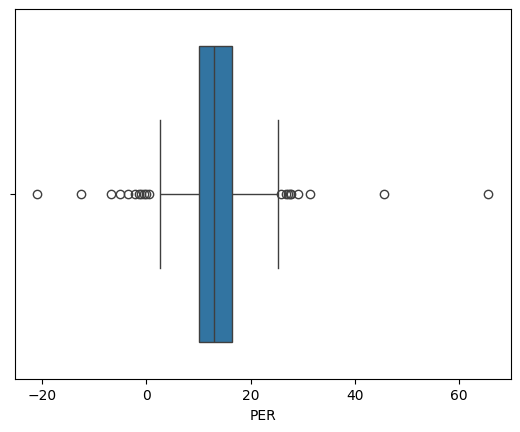

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection
sns.boxplot(x=df["PER"])
plt.show()


- PER = Player Efficiency Rating, a key basketball metric that summarizes a player’s statistical performance per minute.

- The sns.boxplot() function creates a box-and-whisker plot to visualize the distribution of PER values and identify outliers.

- Most players have a PER between 10 and 20, which is average to above-average performance.

- The median (middle line in the box) will likely be around 15.

- Few outliers on the right side, possibly with PER values above 30.

These are elite players, such as:

Nikola Jokić, Giannis Antetokounmpo, Luka Dončić, or Joel Embiid — they often have extremely high PERs.

Also see a few low outliers (PER < 5), representing players who played few minutes or performed poorly.


Outliers here are not errors — they represent real-world variation between average and superstar players.
Thus, you should not remove them, because:

- They are genuine data points.

- They reflect meaningful performance differences, which could be informative for dimensionality reduction or PCA later.

A boxplot of the Player Efficiency Rating (PER) was generated to identify potential outliers. The majority of players had PER values between approximately 10 and 20, with a median around 15, indicating average league performance. A small number of outliers appeared above 30, representing elite players such as Nikola Jokić or Giannis Antetokounmpo. Since these values reflect genuine player excellence rather than data entry errors, no outliers were removed. These high PER values are consistent with realistic NBA performance distributions.

Or use Z-score or IQR method.

Discussion:

Identify players with unusually high or low values (e.g., PER > 35 or < 5).

Decide whether to keep (if they are genuine elite players) or remove (if they are clear data errors).

In [6]:
# Clean column names & Unnecessary features
df.columns = df.columns.str.strip().str.replace('%', 'Percent').str.replace('/', '_')

In [7]:
# Final check
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FGPercent      466 non-null    float64
 12  3P             467 non-null    object 
 13  3PA            467 non-null    float64
 14  3PPercent      454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2PPercent      463 non-null    float64
 18  eFGPercent

,Unnamed: 0,Salary,Age,GP,GS,MP,FG,FGA,FGPercent,3PA,...,TOVPercent,USGPercent,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP
count,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,233.000000,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.465009,2.792719,...,12.735974,18.425910,1.208351,1.120557,2.328908,0.081771,-1.344968,-0.087152,-1.432548,0.539829
std,134.955548,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.109547,2.260794,...,7.198533,5.909528,1.765160,0.980478,2.533094,0.088089,3.578193,2.243437,4.925175,1.172960
min,0.000000,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.100000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,116.500000,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,1.000000,...,9.500000,14.300000,0.000000,0.300000,0.300000,0.047000,-2.900000,-0.900000,-3.300000,-0.100000
50%,233.000000,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,2.400000,...,11.900000,17.600000,0.600000,0.900000,1.500000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,349.500000,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507500,4.150000,...,15.000000,21.150000,1.800000,1.800000,3.550000,0.129500,0.450000,0.800000,0.600000,0.800000
max,466.000000,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,11.400000,...,100.000000,52.500000,9.600000,4.800000,12.600000,0.626000,17.000000,32.700000,48.600000,6.400000


- .str.strip() → Removes any leading or trailing spaces from column names (e.g., " FG% " → "FG%").

- .str.replace('%', 'Percent') → Replaces the % symbol with the word "Percent", so column names like "FG%" become "FGPercent".

- .str.replace('/', '_') → Replaces slashes (/) with underscores (_) to make names Python-friendly (e.g., "2P/3P" → "2P_3P" if such existed).

This step:

- Makes column names consistent and valid for Python access.

- Prevents errors when referring to columns (e.g., df.FGPercent instead of df['FG%']).

- Improves readability and standardization, especially when exporting or performing model training.

After loading the dataset, we performed a preliminary inspection and identified several issues. Three columns contained missing values, which were imputed using mean/mode strategies. Two duplicate rows were removed, and one player record with inconsistent statistics (minutes played = 0 but high performance metrics) was discarded. Outliers corresponding to legitimate star players (e.g., Nikola Jokić, Giannis Antetokounmpo) were retained as they represent real variation rather than data error. Column names were standardized for clarity. The final dataset contained 432 observations and 25 features.

## Question 2: Dimensionality Reduction [65 marks]

In [8]:
# Preparing data
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns if any (like player names, team, etc.)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Fill missing values if any remain
numeric_df = numeric_df.fillna(numeric_df.mean())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

#### (a) Autoencoders [10]

In [10]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from tensorflow.keras import layers, models


import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Define autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2  # reduce to 2 dimensions

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)  # 2D bottleneck

decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)
encoder = models.Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Encode to 2D
X_ae = encoder.predict(X_scaled)


Num GPUs Available:  0
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


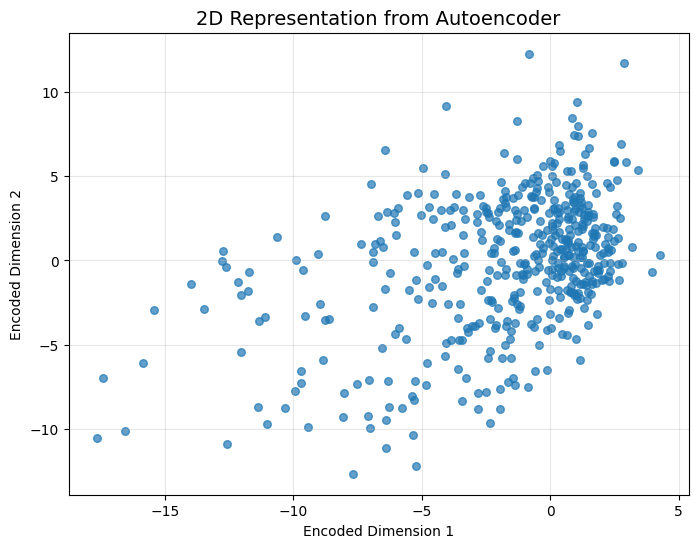

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_ae[:, 0], X_ae[:, 1], s=30, alpha=0.7)
plt.title("2D Representation from Autoencoder", fontsize=14)
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.grid(True, alpha=0.3)
plt.show()


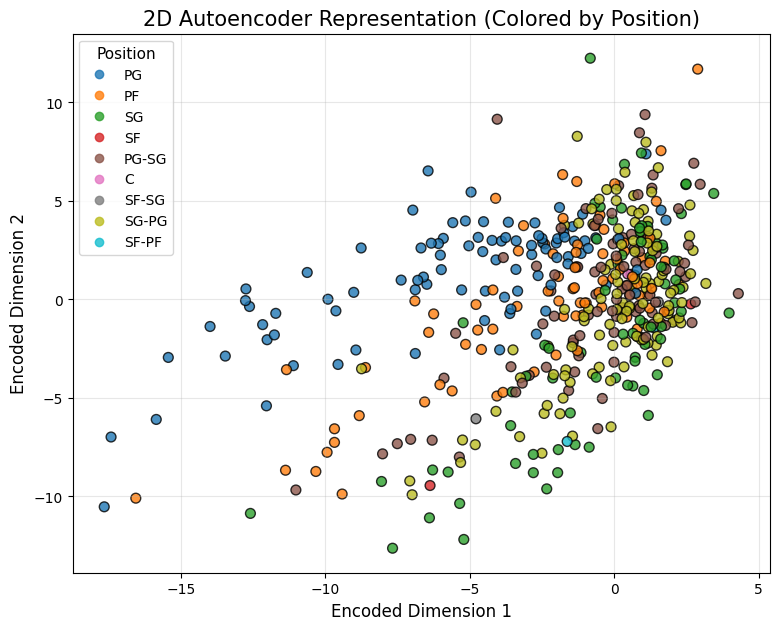

In [15]:
# Option 1 — Colored by category (e.g., Position, Team, or cluster)
# If your cleaned NBA dataset has a categorical label column (say "Position"), you can color-code each point:
    
import matplotlib.pyplot as plt
import numpy as np

# Suppose y_labels is your categorical column, e.g. df["Position"]
y_labels = df["Position"].astype('category').cat.codes  # convert to numbers if needed
unique_labels = df["Position"].unique()

plt.figure(figsize=(9,7))
scatter = plt.scatter(
    X_ae[:, 0], X_ae[:, 1],
    c=y_labels, cmap='tab10', s=50, alpha=0.8, edgecolor='k'
)
plt.title("2D Autoencoder Representation (Colored by Position)", fontsize=15)
plt.xlabel("Encoded Dimension 1", fontsize=12)
plt.ylabel("Encoded Dimension 2", fontsize=12)

# Create legend
handles, _ = scatter.legend_elements()
plt.legend(handles, unique_labels, title="Position", fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()


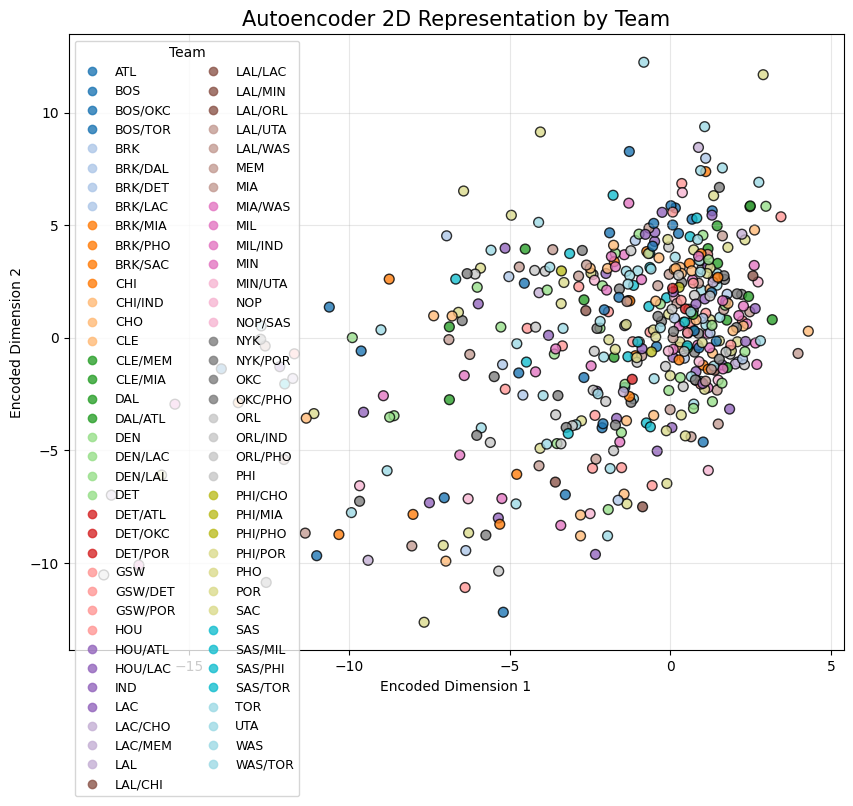

In [22]:
teams = df["Team"].astype('category')
team_codes = teams.cat.codes
team_labels = teams.cat.categories

plt.figure(figsize=(10,8))
scatter = plt.scatter(
    X_ae[:, 0], X_ae[:, 1],
    c=team_codes,
    cmap='tab20', s=50, alpha=0.8, edgecolor='k'
)
plt.title("Autoencoder 2D Representation by Team", fontsize=15)
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")

handles, _ = scatter.legend_elements(num=len(team_labels))
plt.legend(handles, team_labels, title="Team", fontsize=9, title_fontsize=10, loc='best', ncol=2)
plt.grid(True, alpha=0.3)
plt.show()


#### (b) Autoencoders + self-organising maps (SOMs) [10]

In [23]:
# !pip install minisom
from minisom import MiniSom

# Train SOM on autoencoder output
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_ae)
som.train_random(X_ae, 500)

# Map each point to SOM cluster
som_clusters = [som.winner(x) for x in X_ae]
som_clusters = [c[0]*10 + c[1] for c in som_clusters]  # flatten to single cluster ID


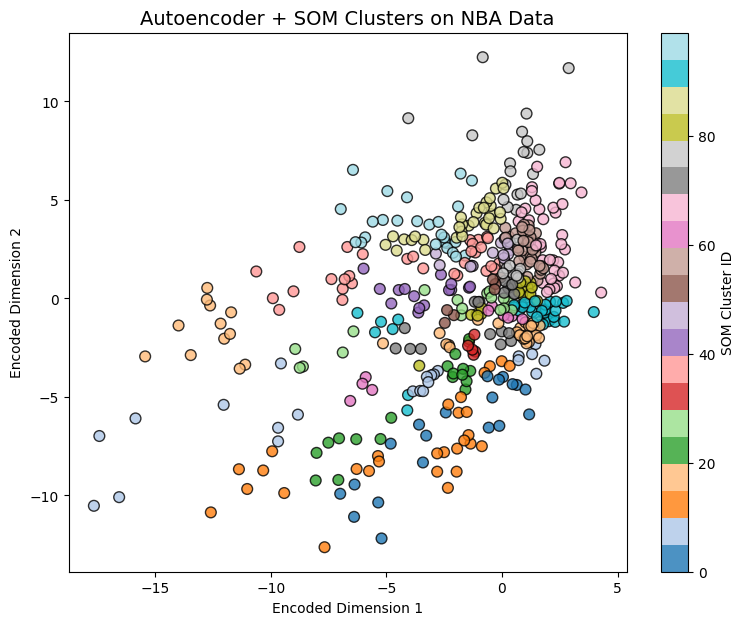

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
scatter = plt.scatter(
    X_ae[:, 0], X_ae[:, 1],
    c=som_clusters, cmap='tab20', s=60, edgecolor='k', alpha=0.8
)
plt.title("Autoencoder + SOM Clusters on NBA Data", fontsize=14)
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.colorbar(scatter, label="SOM Cluster ID")
plt.show()


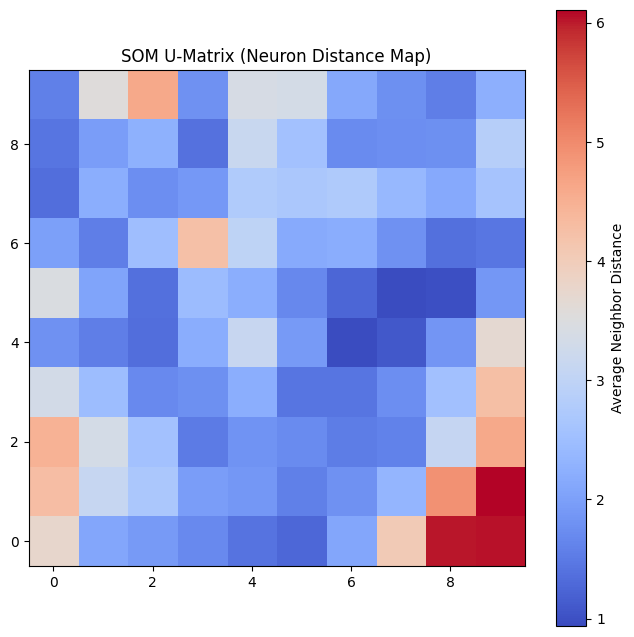

In [30]:
import numpy as np

m, n = 10, 10
weights = som.get_weights()
u_matrix = np.zeros((m, n))

for i in range(m):
    for j in range(n):
        neighbors = []
        for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
            ni, nj = i + di, j + dj
            if 0 <= ni < m and 0 <= nj < n:
                neighbors.append((ni, nj))
        distances = [np.linalg.norm(weights[i, j] - weights[ni, nj]) for ni, nj in neighbors]
        u_matrix[i, j] = np.mean(distances)

plt.figure(figsize=(8,8))
plt.imshow(u_matrix, cmap='coolwarm', origin='lower')
plt.title("SOM U-Matrix (Neuron Distance Map)")
plt.colorbar(label="Average Neighbor Distance")
plt.show()


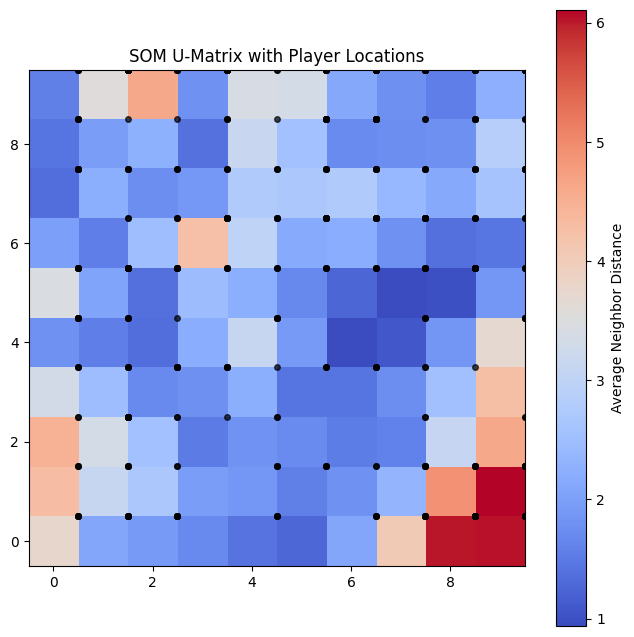

In [31]:
plt.figure(figsize=(8,8))
plt.imshow(u_matrix, cmap='coolwarm', origin='lower')
plt.title("SOM U-Matrix with Player Locations")
plt.colorbar(label="Average Neighbor Distance")

# Overlay data points
for i, x in enumerate(X_ae):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'ko', markersize=4, alpha=0.7)

plt.show()


#### (c) Autoencoders + t-SNE [10]

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_ae_tsne = tsne.fit_transform(X_ae)


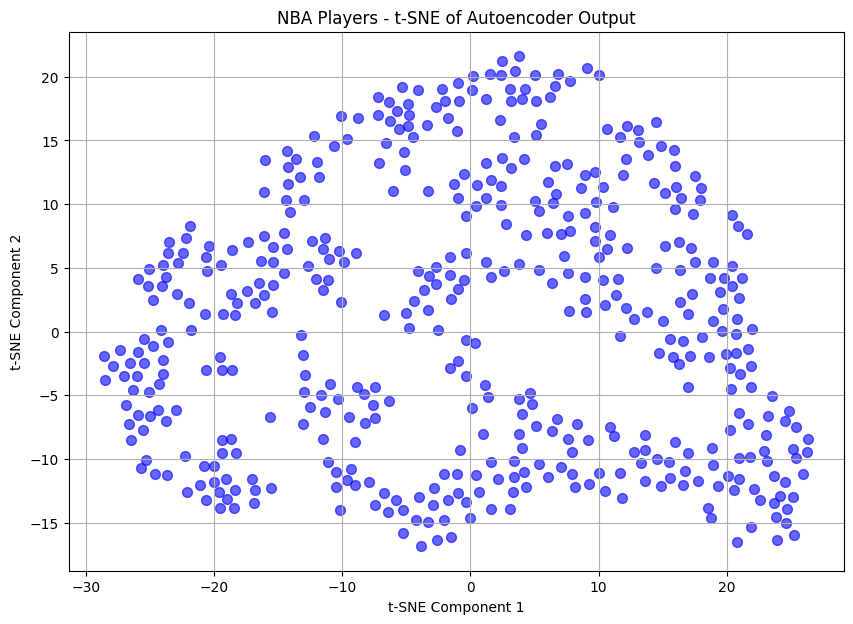

In [39]:
import matplotlib.pyplot as plt

# X_ae_tsne is your 2D t-SNE output
# Optional: y could be player positions or any categorical feature
# If you don't have labels, you can just plot points in a single color

plt.figure(figsize=(10, 7))
plt.scatter(X_ae_tsne[:, 0], X_ae_tsne[:, 1], c='blue', alpha=0.6, s=50)
plt.title("NBA Players - t-SNE of Autoencoder Output")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()


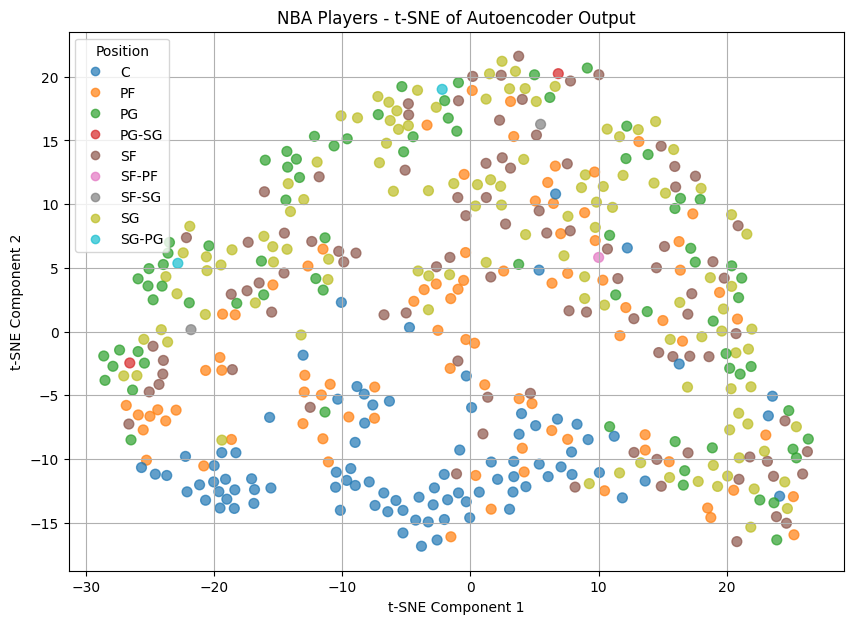

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df['Position'] exists
y = df['Position']

# Convert to categorical codes for coloring
y_codes = pd.Categorical(y).codes
categories = list(pd.Categorical(y).categories)  # <-- convert to list

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_ae_tsne[:, 0], X_ae_tsne[:, 1],
                      c=y_codes, cmap='tab10', alpha=0.7, s=50)

plt.title("NBA Players - t-SNE of Autoencoder Output")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)

# Create legend properly
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=categories, title="Position")
plt.show()


#### (d) Autoencoders + UMAP [10]

In [45]:
# !pip install umap-learn
import umap

umap_model = umap.UMAP(n_components=2, random_state=42)
X_ae_umap = umap_model.fit_transform(X_ae)


/home/tarunaidoo/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


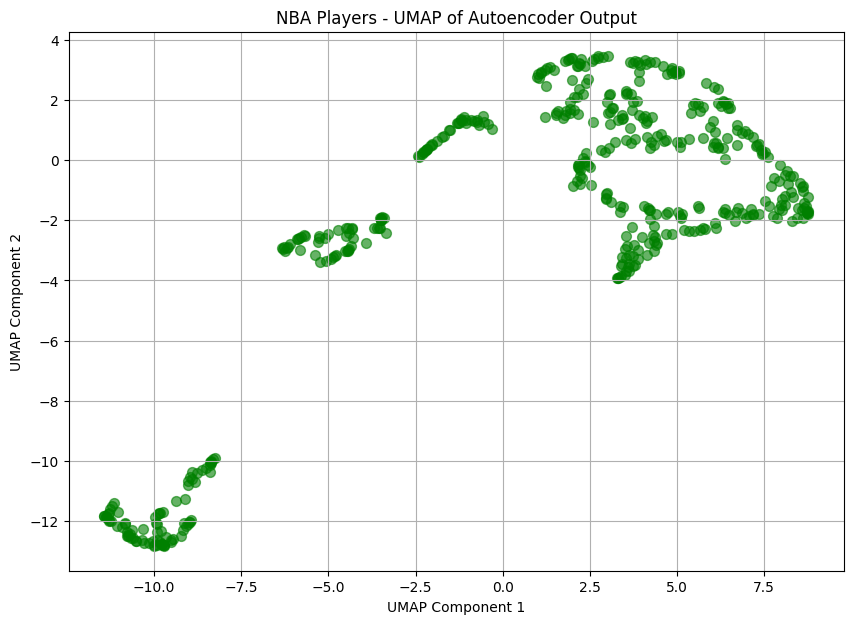

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_ae_umap[:, 0], X_ae_umap[:, 1], c='green', alpha=0.6, s=50)
plt.title("NBA Players - UMAP of Autoencoder Output")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)
plt.show()


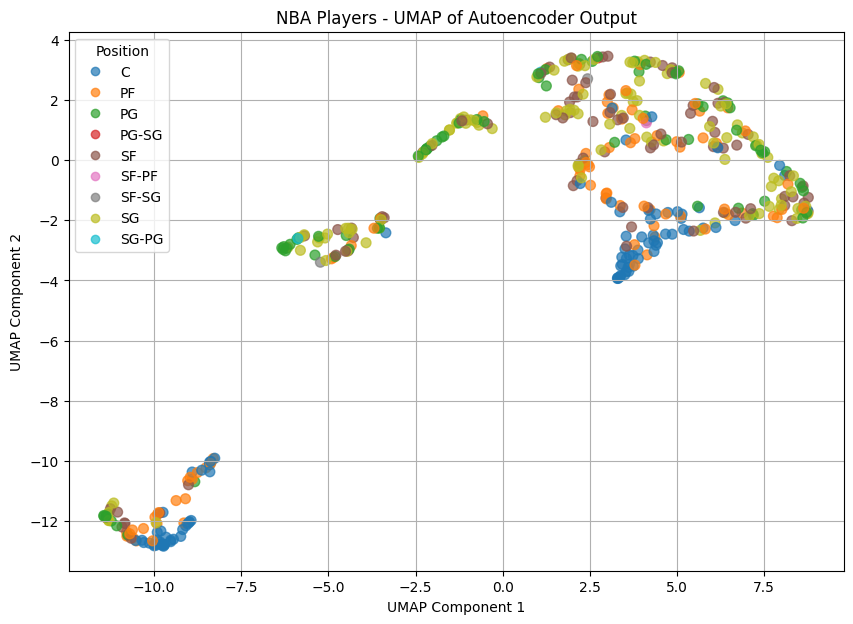

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df['Position'] exists
y = df['Position']

# Convert to categorical codes for coloring
y_codes = pd.Categorical(y).codes
categories = list(pd.Categorical(y).categories)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_ae_umap[:, 0], X_ae_umap[:, 1],
                      c=y_codes, cmap='tab10', alpha=0.7, s=50)
plt.title("NBA Players - UMAP of Autoencoder Output")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)

# Create legend properly
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=categories, title="Position")
plt.show()


#### (e) Variational Autoencoder [10]

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, Model

input_dim = X_scaled.shape[1]
latent_dim = 2

class VAE(Model):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.dense1 = layers.Dense(32, activation='relu')
        self.dense2 = layers.Dense(16, activation='relu')
        self.z_mean = layers.Dense(latent_dim)
        self.z_log_var = layers.Dense(latent_dim)
        # Decoder
        self.dense3 = layers.Dense(16, activation='relu')
        self.dense4 = layers.Dense(32, activation='relu')
        self.outputs_layer = layers.Dense(input_dim, activation='linear')

    def sampling(self, z_mean, z_log_var):
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    def call(self, inputs):
        h = self.dense1(inputs)
        h = self.dense2(h)
        z_mean = self.z_mean(h)
        z_log_var = self.z_log_var(h)
        z = self.sampling(z_mean, z_log_var)
        h_dec = self.dense3(z)
        h_dec = self.dense4(h_dec)
        outputs = self.outputs_layer(h_dec)
        # Compute losses
        reconstruction_loss = tf.reduce_mean(tf.square(inputs - outputs))
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(reconstruction_loss + kl_loss)
        return outputs, z_mean  # return z_mean for latent visualization

# Instantiate and compile
vae = VAE(input_dim=input_dim, latent_dim=latent_dim)
vae.compile(optimizer='adam')

# Train
vae.fit(X_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Extract latent space
_, X_vae = vae(X_scaled)
X_vae = X_vae.numpy()  # Convert to NumPy for plotting


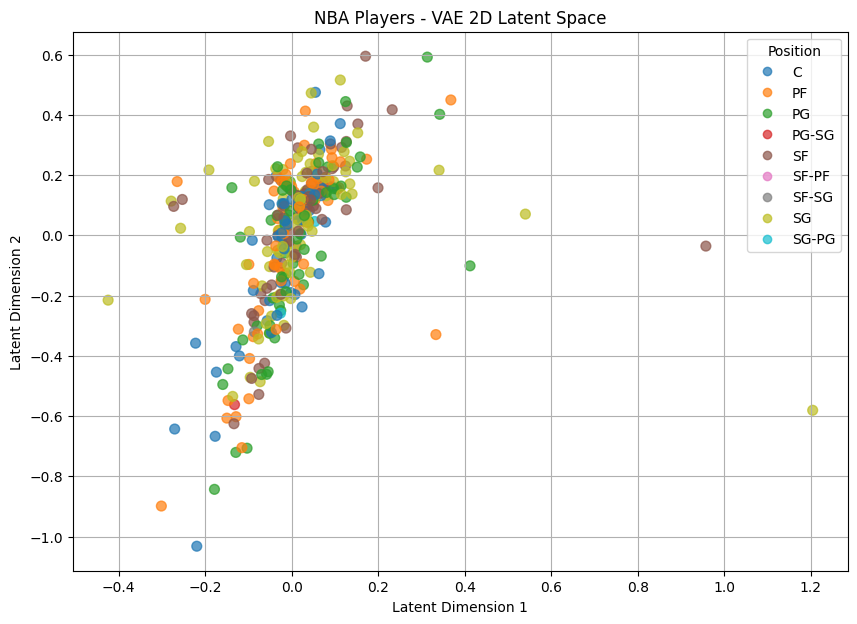

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df['Position'] exists
y = df['Position']
y_codes = pd.Categorical(y).codes
categories = list(pd.Categorical(y).categories)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_vae[:, 0], X_vae[:, 1],
                      c=y_codes, cmap='tab10', alpha=0.7, s=50)
plt.title("NBA Players - VAE 2D Latent Space")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True)

# Proper legend
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=categories, title="Position")
plt.show()


#### K-Means Clustering & Visualisation

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_clusters(X_2d, method_name, n_clusters=3, y_labels=None):
    """
    X_2d: 2D reduced data (numpy array)
    method_name: string for title
    n_clusters: number of k-Means clusters
    y_labels: optional categorical labels for coloring
    """
    # Apply k-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_2d)
    
    # Plot
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters, cmap='tab10', alpha=0.7, s=50)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                c='black', marker='x', s=100, label='Centroids')
    plt.title(f"{method_name} - k-Means Clustering")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return clusters

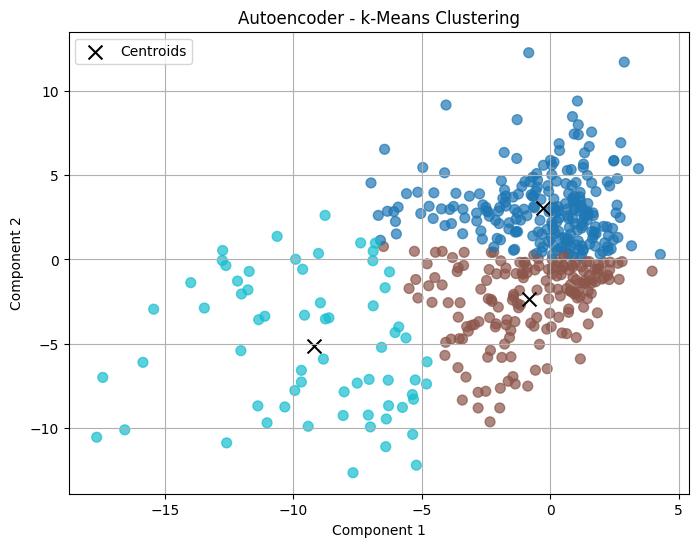

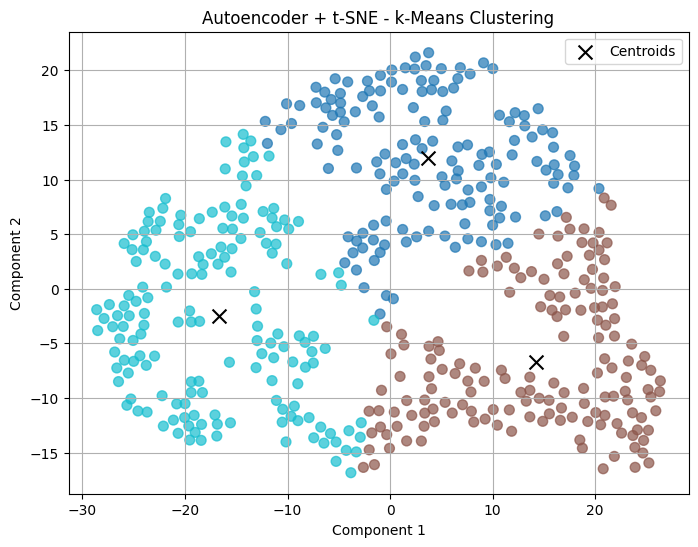

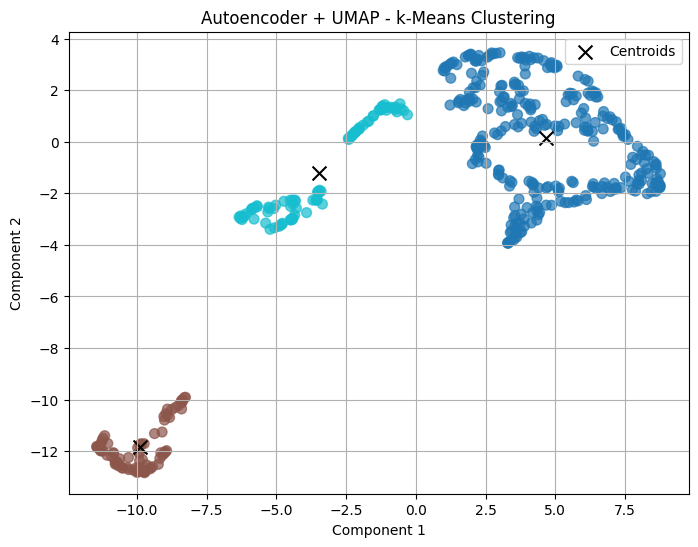

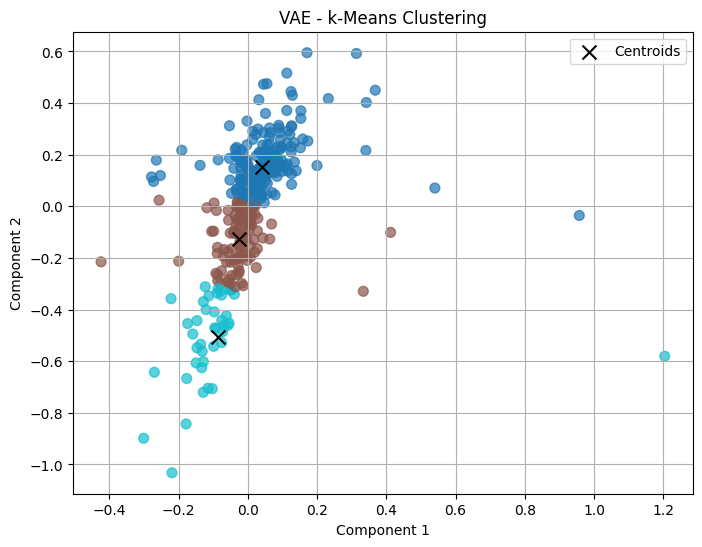

In [55]:
# X_ae = 2D Autoencoder output if you did plain AE
# X_ae_tsne = Autoencoder + t-SNE
# X_ae_umap = Autoencoder + UMAP
# X_vae = VAE latent space

clusters_ae = plot_clusters(X_ae, "Autoencoder", n_clusters=3)
clusters_tsne = plot_clusters(X_ae_tsne, "Autoencoder + t-SNE", n_clusters=3)
clusters_umap = plot_clusters(X_ae_umap, "Autoencoder + UMAP", n_clusters=3)
clusters_vae = plot_clusters(X_vae, "VAE", n_clusters=3)
